# Approaach -2

In this, by preprocessing the data like feature-scaling & One-hot encoding. 

Steps: 
- We'll be importing the required packages. 
- Converting the features into appropriate data types. 
- Plotting the distribution plots for the categorical. 
- Feature scaling of numerical features & One-hot encoding of categorical features. 
- Creating clusters without the target feature. 
- Creating t-SNE components in 1-D, 2-D, 3-D. 

In [1]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly 
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.shape

(517, 13)

In [4]:
X = data.copy()

In [5]:
X.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
import seaborn as sns 


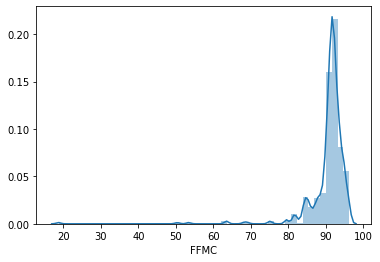

In [7]:
sns.distplot(X['FFMC'], hist =True)

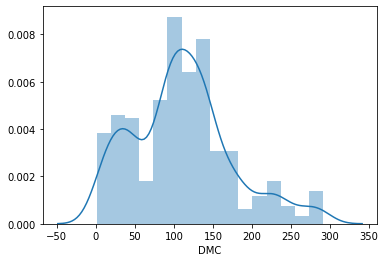

In [8]:
sns.distplot(X['DMC'], hist =True)

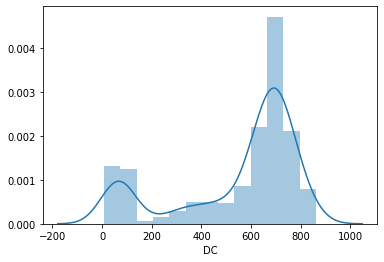

In [9]:
sns.distplot(X['DC'], hist =True)

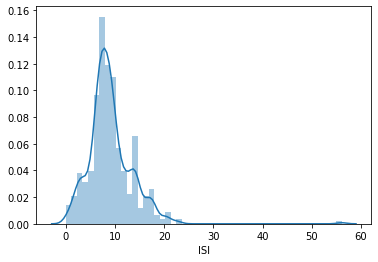

In [10]:
sns.distplot(X['ISI'], hist =True)

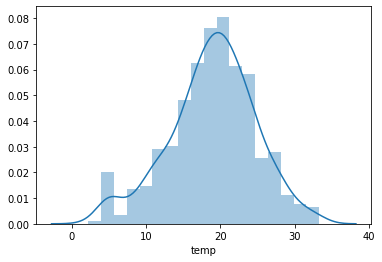

In [11]:
sns.distplot(X['temp'], hist =True)

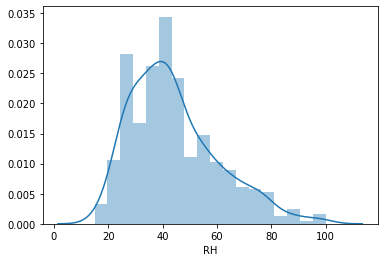

In [12]:
sns.distplot(X['RH'], hist =True)

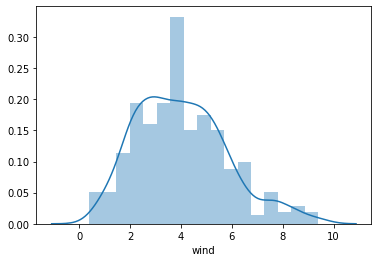

In [13]:
sns.distplot(X['wind'], hist =True)

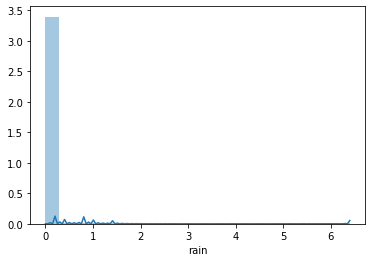

In [14]:
sns.distplot(X['rain'], hist =True)

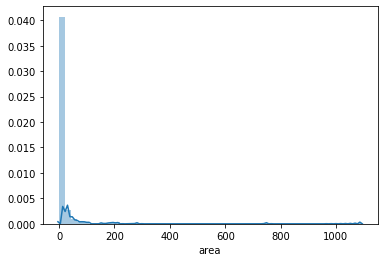

In [15]:
sns.distplot(X['area'], hist =True)

## The target feature is skewed to the left, we can do logarithm of it for making it better. 

In [16]:
# dropping off the target feature 
data.drop(columns=['area'], inplace=True)

In [17]:
#numer is the DataFrame that holds all of X's numerical variables
numer = X[['FFMC','DMC','DC','ISI','temp','RH','wind','rain']]

In [18]:
#cater is the DataFrame that holds all of X's categorical variables
cater = X[['X','Y','month','day']]

In [19]:
numer.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [20]:
cater.head()

,X,Y,month,day
0,7,5,mar,fri
1,7,4,oct,tue
2,7,4,oct,sat
3,8,6,mar,fri
4,8,6,mar,sun


In [21]:
#Initialize our scaler
scaler = StandardScaler()

In [22]:
#Scale each column in numer
numer = pd.DataFrame(scaler.fit_transform(numer))

In [23]:
numer.columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']

In [24]:
X = pd.concat([numer, cater], axis=1, join='inner')

### Dummification of the categorical data

In [25]:
X = pd.get_dummies(X)

In [26]:
X.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X,Y,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,7,5,...,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,7,4,...,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,7,4,...,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,8,6,...,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,8,6,...,0,0,0,0,0,0,1,0,0,0


### Initializing by clustering 

In [27]:
#Initialize our model
kmeans = KMeans(n_clusters=3)

In [28]:
#Fit our model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
#Find which cluster each data-point belongs to
clusters = kmeans.predict(X)

In [30]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters

In [31]:
#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(X))
plotX.columns = X.columns

In [32]:
#Set our perplexity and it can range from 5-50 
perplexity = 40

### Creating t-SNE components with different values 

In [33]:
#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

#### Making those values into a dataframe separately 

In [34]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [35]:
TCs_1d.columns = ["TC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]

In [36]:
## Joining the components along with the data 
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [37]:
plotX["dummy"] = 0

In [38]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

## Plotting t-SNE plots in differnt dimensions 

## 1-D plot

In [39]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data= data, layout =layout)
iplot(fig)

## 2-D plot

In [40]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## 3-D plot

In [41]:
#Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)